# PARTIE 2 : Prédiction des prix de location

## Import librairies

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

import warnings
warnings.filterwarnings('ignore', category=DeprecationWarning)
warnings.filterwarnings('ignore', category=UserWarning)

## Lecture des données

In [2]:
dataset = pd.read_csv('./src/get_around_pricing_project.csv')
dataset.drop(['Unnamed: 0'], axis=1, inplace=True)
print(dataset.shape)
dataset.head()

(4843, 14)


,model_key,mileage,engine_power,fuel,paint_color,car_type,private_parking_available,has_gps,has_air_conditioning,automatic_car,has_getaround_connect,has_speed_regulator,winter_tires,rental_price_per_day
0,Citroën,140411,100,diesel,black,convertible,True,True,False,False,True,True,True,106
1,Citroën,13929,317,petrol,grey,convertible,True,True,False,False,False,True,True,264
2,Citroën,183297,120,diesel,white,convertible,False,False,False,False,True,False,True,101
3,Citroën,128035,135,diesel,red,convertible,True,True,False,False,True,True,True,158
4,Citroën,97097,160,diesel,silver,convertible,True,True,False,False,False,True,True,183


In [3]:
dataset.car_type.value_counts()

car_type
estate         1606
sedan          1168
suv            1058
hatchback       699
subcompact      117
coupe           104
convertible      47
van              44
Name: count, dtype: int64

In [4]:
dataset.to_csv('./src/get_around_pricing_project_clean.csv', index=False)

In [5]:
dataset.isna().sum()

model_key                    0
mileage                      0
engine_power                 0
fuel                         0
paint_color                  0
car_type                     0
private_parking_available    0
has_gps                      0
has_air_conditioning         0
automatic_car                0
has_getaround_connect        0
has_speed_regulator          0
winter_tires                 0
rental_price_per_day         0
dtype: int64

In [6]:
dataset.dtypes

model_key                    object
mileage                       int64
engine_power                  int64
fuel                         object
paint_color                  object
car_type                     object
private_parking_available      bool
has_gps                        bool
has_air_conditioning           bool
automatic_car                  bool
has_getaround_connect          bool
has_speed_regulator            bool
winter_tires                   bool
rental_price_per_day          int64
dtype: object

In [7]:
dataset.describe(include='all')

,model_key,mileage,engine_power,fuel,paint_color,car_type,private_parking_available,has_gps,has_air_conditioning,automatic_car,has_getaround_connect,has_speed_regulator,winter_tires,rental_price_per_day
count,4843,4.843000e+03,4843.00000,4843,4843,4843,4843,4843,4843,4843,4843,4843,4843,4843.000000
unique,28,NaN,NaN,4,10,8,2,2,2,2,2,2,2,NaN
top,Citroën,NaN,NaN,diesel,black,estate,True,True,False,False,False,False,True,NaN
freq,969,NaN,NaN,4641,1633,1606,2662,3839,3865,3881,2613,3674,4514,NaN
mean,NaN,1.409628e+05,128.98823,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,121.214536
std,NaN,6.019674e+04,38.99336,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,33.568268
min,NaN,-6.400000e+01,0.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.000000
25%,NaN,1.029135e+05,100.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,104.000000
50%,NaN,1.410800e+05,120.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,119.000000
75%,NaN,1.751955e+05,135.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,136.000000


## Entraînement d'un modèle de machine learning

Nous sommes dans un problème de régression linéaire. 

Nous cherchons à prédire un chiffre : le montant optimal du prix de location par journalier suivant le véhicule.

## Preprocessings

### Isoler la variable cible

In [8]:
# Seperate target variable y from features X:
target_variable = ['rental_price_per_day']
print('Separating labels from features...')
y = dataset.loc[:,target_variable]
X = dataset.drop(target_variable, axis = 1)
print('...Done')
print()
print('y:')
print(y.head())
print()
print('X:')
print(X.head())
print()

Separating labels from features...
...Done

y:
   rental_price_per_day
0                   106
1                   264
2                   101
3                   158
4                   183

X:
  model_key  mileage  engine_power    fuel paint_color     car_type  \
0   Citroën   140411           100  diesel       black  convertible   
1   Citroën    13929           317  petrol        grey  convertible   
2   Citroën   183297           120  diesel       white  convertible   
3   Citroën   128035           135  diesel         red  convertible   
4   Citroën    97097           160  diesel      silver  convertible   

   private_parking_available  has_gps  has_air_conditioning  automatic_car  \
0                       True     True                 False          False   
1                       True     True                 False          False   
2                      False    False                 False          False   
3                       True     True                 False       

### Diviser le jeu de données en train set et test set

In [9]:
# Divide dataset into train set and test set:
print('Dividing into train set and test set...')
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
print('...Done')
print()

Dividing into train set and test set...
...Done



### Distinguer les variables numériques et catégorielles

In [10]:
# Distinguish numeric and categorical features:
numeric_features = ['mileage', 'engine_power']
categorical_features = ['model_key', 'fuel', 'paint_color', 'car_type', 'private_parking_available', 'has_gps', 'has_air_conditioning', 'automatic_car', 'has_getaround_connect', 'has_speed_regulator', 'winter_tires']

# Create pipeline for numeric features:
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

# Create pipeline for categorical features:
categorical_transformer = Pipeline(steps=[
    ('encoder', OneHotEncoder(drop='first', handle_unknown='ignore'))
])

# Use ColumnTransformer to make a preprocessor object that describes all the treatments to be done:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ]
)

### Application des preprocessings

In [11]:
# Preprocessings on train set:
print('Performing preprocessings on train set...')
print(X_train.head())
X_train = preprocessor.fit_transform(X_train)
print('...Done')
print(X_train[0:5])
print()

# Preprocessings on test set:
print('Performing preprocessings on test set:')
print(X_test.head())
X_test = preprocessor.transform(X_test)
print('...Done')
print(X_test[0:5])
print()

Performing preprocessings on train set...
     model_key  mileage  engine_power    fuel paint_color car_type  \
4550       BMW   132485           135  diesel       white      suv   
1237   Citroën   131121           135  diesel       black   estate   
3158   Renault   209216           135  diesel        grey    sedan   
900    Peugeot   148986           100  diesel       black   estate   
933    Citroën   170500           135  diesel       black   estate   

      private_parking_available  has_gps  has_air_conditioning  automatic_car  \
4550                       True     True                 False          False   
1237                      False     True                 False          False   
3158                       True     True                 False          False   
900                        True     True                 False          False   
933                        True     True                 False          False   

      has_getaround_connect  has_speed_regulator  

## Entraînement d'un modèle de base

Nous entraînons un modèle de régression linéaire.

In [12]:
# Model training:
baseline = LinearRegression()
print('Training model...')
baseline.fit(X_train, y_train)
print('...Done')

Training model...
...Done


## Prédictions

In [13]:
# Predictions on training set:
print('Prediction on training set...')
y_train_pred = baseline.predict(X_train)
print('...Done')
print(y_train_pred[0:5])
print()

Prediction on training set...
...Done
[[132.11472904]
 [118.97972318]
 [118.29209294]
 [101.0444328 ]
 [104.69670365]]



In [14]:
# Predictions on test set:
print('Prediction on test set...')
y_test_pred = baseline.predict(X_test)
print('...Done')
print(y_test_pred[0:5])
print()

Prediction on test set...
...Done
[[ 91.36911628]
 [157.56519238]
 [105.17967036]
 [ 72.2206298 ]
 [100.58722405]]



## Évaluation des performances du modèle

Nous utilisons la métrique R2 pour évaluer la performance de notre modèle.

Nous examinons l'écart entre la prédiction et la valeur réelle avec la MSE et la RMSE.

In [15]:
# Compute scores: 
r2 = baseline.score(X_train, y_train)
r2_test = baseline.score(X_test, y_test)
mse = mean_squared_error(y_train, y_train_pred)
mse_test = mean_squared_error(y_test, y_test_pred)

In [17]:
# Print scores:
print('BASELINE, R2 score on train set:', baseline.score(X_train, y_train))
print('BASELINE, R2 score on test set:', baseline.score(X_test, y_test))
print()
print("BASELINE, MSE score on train set : ", mse)
print("BASELINE, MSE score on test set : ", mse_test)
print()
print("BASELINE, RMSE score on train set : ", np.sqrt(mse))
print("BASELINE, RMSE score on test set : ", np.sqrt(mse_test))

BASELINE, R2 score on train set: 0.7156703436007328
BASELINE, R2 score on test set: 0.6892820715977412

BASELINE, MSE score on train set :  323.21284639020604
BASELINE, MSE score on test set :  337.41848561594884

BASELINE, RMSE score on train set :  17.97812132538342
BASELINE, RMSE score on test set :  18.368954396370764


### Résultats :

- Le R2 score est correct mais pas excellent : 0.71.

- On observe que les scores sur le train set sont meilleurs que les scores du test set. 

- --> Nous avons de l'overfitting, le modèle sur-apprend et a des difficultés à généraliser.

## Importance des features

In [253]:
# Get the names and coefficients of the features:
feature_names_out = preprocessor.get_feature_names_out()
feature_names = [fname for fname in feature_names_out]
coefs = pd.DataFrame(index = feature_names, data = baseline.coef_.transpose(), columns=["coefficients"])

In [254]:
feature_importance = coefs.sort_values(by='coefficients', ascending=False)
print(len(feature_importance))
negative_coefs = feature_importance[feature_importance['coefficients']<0]

53


In [255]:
# Compute abs() and sort values:
feature_importance_abs = abs(coefs).sort_values(by='coefficients', ascending=False)
feature_importance_abs = feature_importance_abs.transpose()
feature_importance_abs

,cat__model_key_Honda,cat__model_key_Suzuki,cat__fuel_hybrid_petrol,cat__model_key_Maserati,cat__model_key_Yamaha,cat__model_key_SEAT,cat__model_key_Fiat,cat__model_key_Toyota,cat__car_type_van,cat__model_key_Opel,...,cat__paint_color_red,cat__car_type_sedan,cat__model_key_Nissan,cat__paint_color_brown,cat__paint_color_blue,cat__has_air_conditioning_1,cat__private_parking_available_1,cat__model_key_Lamborghini,cat__paint_color_black,cat__paint_color_grey
coefficients,63.341485,40.05879,38.533721,36.695858,36.526594,34.294238,32.964875,28.045712,26.019922,24.431297,...,3.013649,2.649834,2.385572,2.229498,1.925486,1.19844,0.645281,0.562753,0.476977,0.410989


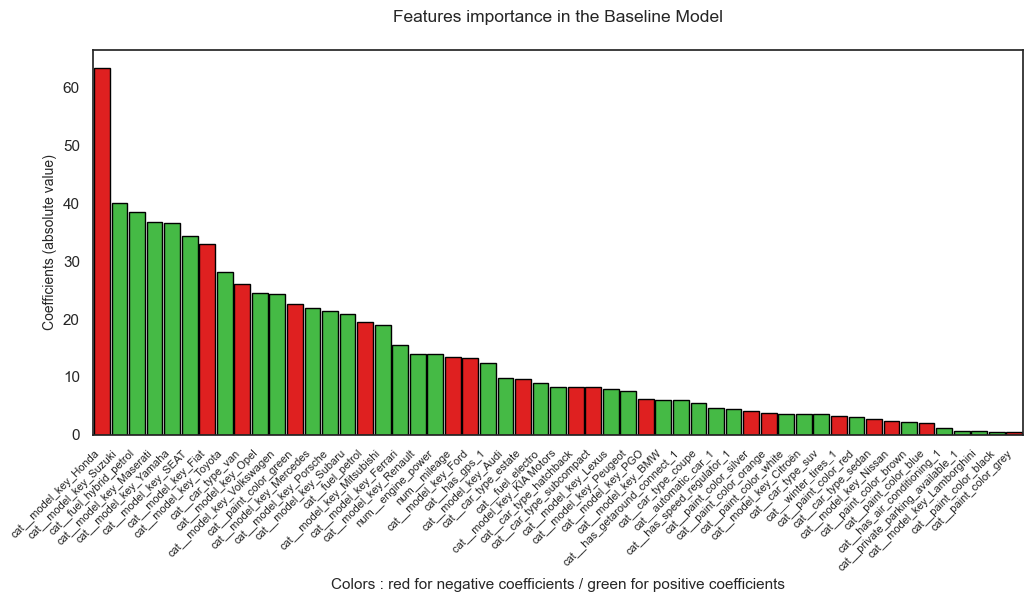

In [256]:
# Plot coefficients (in absolute value):
import seaborn as sns
import matplotlib.pyplot as plt 

colors = ['red' if y in negative_coefs.index else 'limegreen' for y in feature_importance_abs.columns]
sns.set(rc={'figure.figsize':(12, 5)}, style='white')
sns.barplot(data = feature_importance_abs,orient = 'v', palette = colors, width = .9, edgecolor = 'black')
plt.title('Features importance in the Baseline Model', fontsize=12.5, pad=20)
plt.xlabel('Colors : red for negative coefficients / green for positive coefficients', fontsize=11)
plt.ylabel('Coefficients (absolute value)', fontsize=10)
plt.xticks(fontsize=9, fontweight='bold', rotation=45, ha='right')
plt.xticks(feature_importance_abs.columns, fontsize=8, fontweight='normal', rotation=45, ha="right")
plt.legend('', frameon=False)
plt.show()

#  Entraînement d'un modèle régularisé

Nous essayons de combattre l'overfitting en introduisant une régularisation.

## A. Modèle Lasso

Nous testons un modèle de régression linéaire régularisé Lasso.

L'étude de l'importance des features nous a montré que les prédictions sont calculées à partir de 53 features différentes.

Ce nombre de features est important. Lasso permettra de simplifier le modèle en supprimant certaines features en y appliquant un poids de 0.

## Recherche du meilleur alpha

Nous recherchons le meilleur hyperparamètre de régularisation alpha pour notre modèle de régression linéaire Lasso.

In [19]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import cross_val_score, GridSearchCV

alphas = [2, 10, 100]
param_grid = {'alpha': alphas}
lasso = Lasso()

best_lasso = GridSearchCV(estimator=lasso, param_grid=param_grid, cv=5)
best_lasso.fit(X_train, y_train)

print(best_lasso.best_params_)
print(best_lasso.best_score_)

{'alpha': 2}
0.5894844074426526


## Performance

In [20]:
# Compute scores: 
y_train_pred = best_lasso.predict(X_train)
y_test_pred = best_lasso.predict(X_test)

r2 = best_lasso.score(X_train, y_train)
r2_test = best_lasso.score(X_test, y_test)

mse = mean_squared_error(y_train, y_train_pred)
mse_test = mean_squared_error(y_test, y_test_pred)

In [21]:
# Print scores:
print("LASSO, R2 score on train set : ", r2)
print("LASSO, R2 score on test set : ", r2_test)
print()
print("LASSO, MSE score on train set : ", mse)
print("LASSO, MSE score on test set : ", mse_test)
print()
print("LASSO, RMSE score on train set : ", np.sqrt(mse))
print("LASSO, RMSE score on test set : ", np.sqrt(mse_test))

LASSO, R2 score on train set :  0.5892312329002767
LASSO, R2 score on test set :  0.5852142519022132

LASSO, MSE score on train set :  466.94299885504097
LASSO, MSE score on test set :  450.42904250135405

LASSO, RMSE score on train set :  21.608863895518454
LASSO, RMSE score on test set :  21.223313655067017


### Résultats : 

- Avec un hyperparamètre alpha de 2 on arrive à combattre l'overfitting. 

- Cependant le score obtenu est plutôt mauvais : R2 score de 0.58 en sur le train et le test set.

- Par conséquent les erreurs MSE et RMSE ont augmenté : RMSE de 21 contre 18 avec le modèle de base.

## B. Modèle Ridge

Nous testons un modèle de régression linéaire régularisé Ridge.

In [22]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_val_score, GridSearchCV

alphas = [1300, 2800, 5000]
param_grid = {'alpha': alphas}
ridge = Ridge()

best_ridge = GridSearchCV(estimator=ridge, param_grid=param_grid, cv=15)
best_ridge.fit(X_train, y_train)

print(best_ridge.best_params_)
print(best_ridge.best_score_)

{'alpha': 1300}
0.6219623886104078


## Performance

In [23]:
# Compute scores: 
y_train_pred = best_ridge.predict(X_train)
y_test_pred = best_ridge.predict(X_test)

r2 = best_ridge.score(X_train, y_train)
r2_test = best_ridge.score(X_test, y_test)

mse = mean_squared_error(y_train, y_train_pred)
mse_test = mean_squared_error(y_test, y_test_pred)

In [24]:
# Print scores:
print("RIDGE, R2 score on train set : ", r2)
print("RIDGE, R2 score on test set : ", r2_test)
print()
print("RIDGE, MSE score on train set : ", mse)
print("RIDGE, MSE score on test set : ", mse_test)
print()
print("RIDGE, RMSE score on train set : ", np.sqrt(mse))
print("RIDGE, RMSE score on test set : ", np.sqrt(mse_test))

RIDGE, R2 score on train set :  0.6259910595320968
RIDGE, R2 score on test set :  0.6226177033241779

RIDGE, MSE score on train set :  425.1561224913706
RIDGE, MSE score on test set :  409.8114444100387

RIDGE, RMSE score on train set :  20.619314307012505
RIDGE, RMSE score on test set :  20.24380014745351


### Résultats :

- Avec un hyperparamètre alpha de 1300 on arrive à combattre l'overfitting. 

- Le score obtenu est un peu meilleur qu'avec le modèle Lasso : R2 score de 0.62 contre 0.58 avec le modèle Lasso.

- Les erreurs MSE et RMSE restent toutefois supérieures au modèle de base : RMSE de 20 contre 18 avec le modèle de base.

## Conclusion

- Les modèles Lasso et Ridge ont permis de combattre l'overfitting.

- Mais les scores R2, MSE et RMSE sont moins bons par rapport au modèle de base.

- Étant donné que l'overfitting est léger, nous décidons de conserver le modèle de base pour effectuer nos prédictions.